In [1]:
# Importing required libraries..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file..
file = "olympics2024.csv"
dataset =pd.read_csv(file)

In [3]:
# Check for dataset is properly loaded or not..by viewing top 5 rows of dataset..
dataset.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [4]:
# Check for shape of dataset..
dataset.shape

(91, 7)

In [5]:
# Get information about dataset..
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [6]:
# Check for null values..
dataset.isnull().sum()

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [7]:
# Check for unique values count..
dataset.nunique()

Rank            63
Country         91
Country Code    91
Gold            18
Silver          16
Bronze          19
Total           27
dtype: int64

In [8]:
# Check for duplicate values..
dataset.duplicated().sum()

0

In [9]:
dataset.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [10]:
# sum of gold medals..
total_Gold = dataset["Gold"].sum()
total_Gold

328

In [11]:
# sum of silver medals..
total_Silver = dataset["Silver"].sum()
total_Silver

327

In [12]:
# sum of bronze medals..
total_Bronze = dataset["Bronze"].sum()
total_Bronze

384

In [13]:
# Overall sum of medals..
total_medals = dataset["Total"].sum()
total_medals

1039

In [14]:
dataset.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


# DATA  VISUALISATION =>

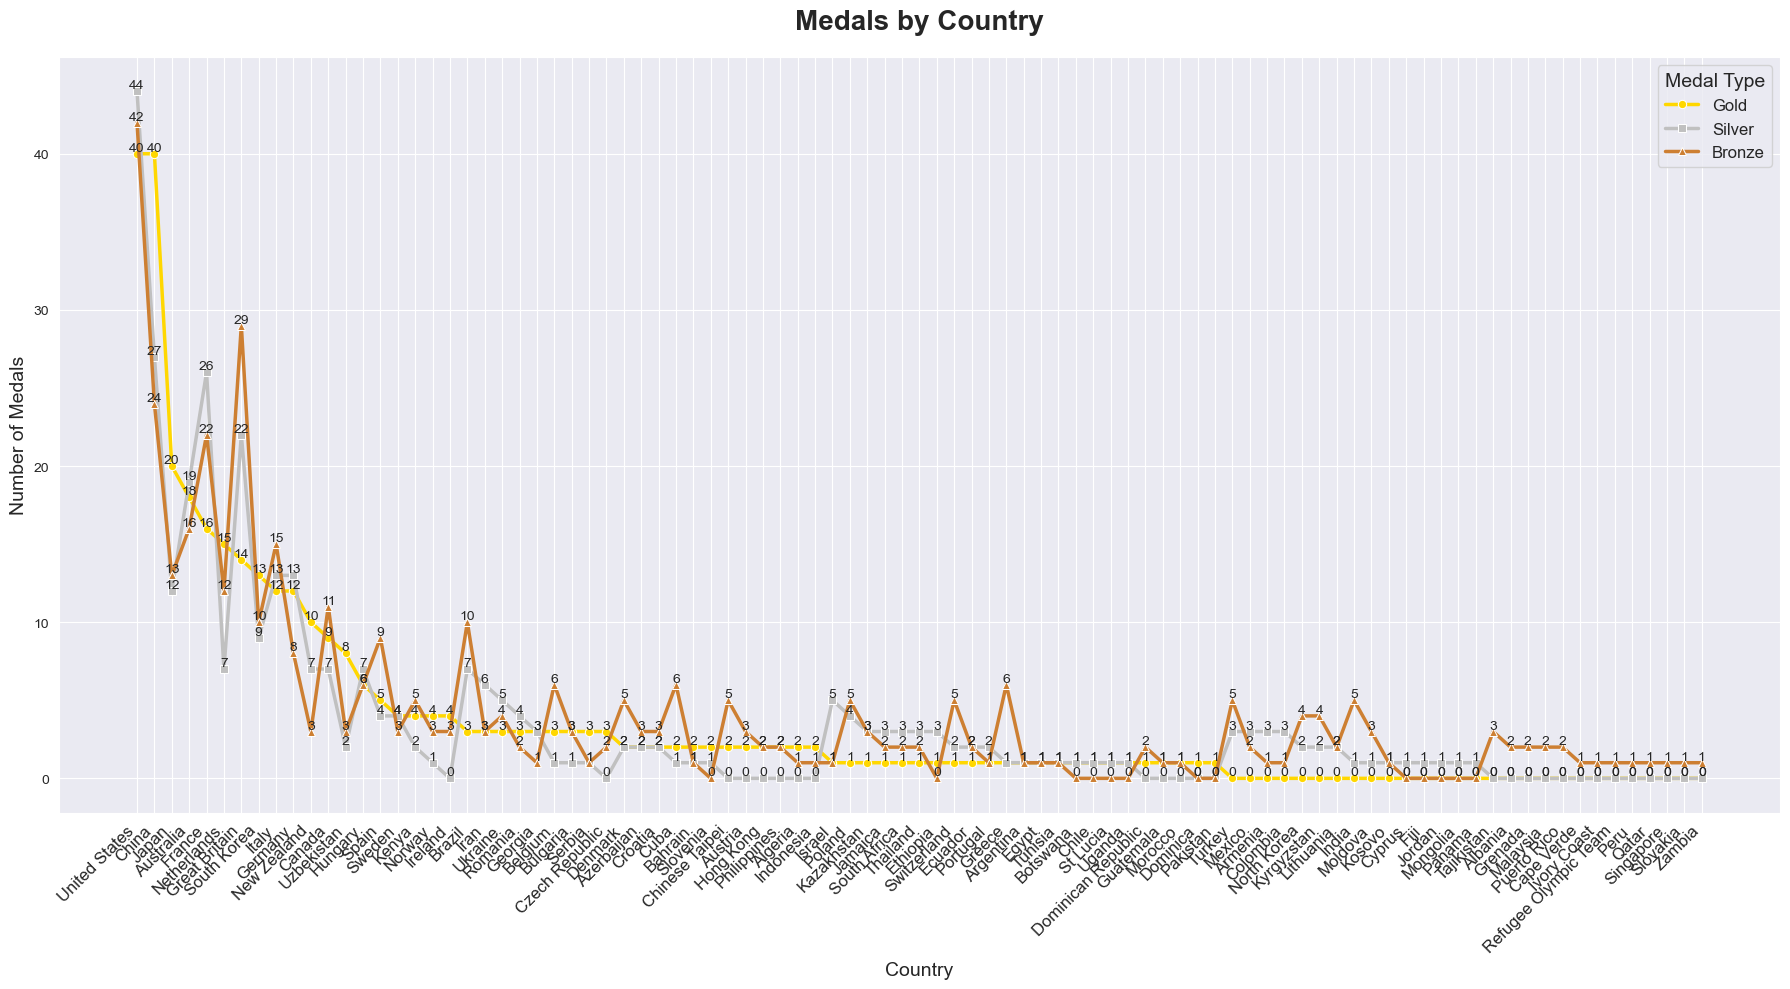

In [25]:
# Plot country wise medal count..
plt.figure(figsize=(18, 10))
sns.set_style("darkgrid")

# Plotting each medal type with custom styles
sns.lineplot(data=dataset, x='Country', y='Gold', label='Gold', color='gold', linewidth=2.5, marker='o')
sns.lineplot(data=dataset, x='Country', y='Silver', label='Silver', color='silver', linewidth=2.5, marker='s')
sns.lineplot(data=dataset, x='Country', y='Bronze', label='Bronze', color='#cd7f32', linewidth=2.5, marker='^')

# Adding title and labels
plt.title('Medals by Country', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding annotations to each point
for line in ['Gold', 'Silver', 'Bronze']:
    for x, y in zip(dataset['Country'], dataset[line]):
        plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10)

# Adding a legend and customizing its appearance
plt.legend(title='Medal Type', fontsize=12, title_fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
# Top 10 countries with most gold medals..
gold_country = dataset.groupby(['Country'], as_index=False)['Gold'].sum().sort_values(by='Gold', ascending=False).head(10)
gold_country

,Country,Gold
15,China,40
88,United States,40
46,Japan,20
4,Australia,18
29,France,16
58,Netherlands,15
32,Great Britain,14
77,South Korea,13
31,Germany,12
43,Italy,12


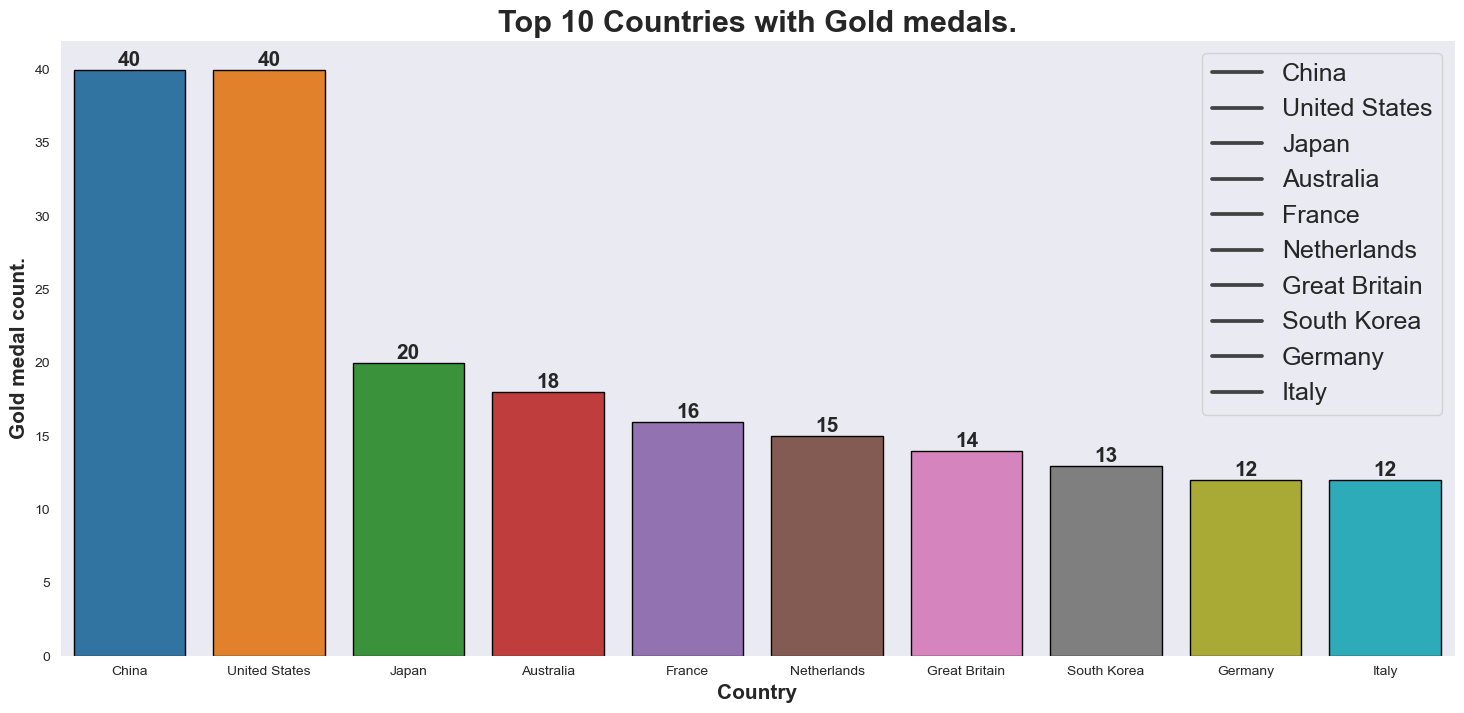

In [17]:
plt.figure(figsize=(18, 8))
ax=sns.barplot(data=gold_country, x='Country', y='Gold', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fontweight='bold', fontsize=15 )
plt.title("Top 10 Countries with Gold medals.", fontweight='bold', fontsize=22)
plt.xlabel('Country', fontweight='bold', fontsize=15)
plt.ylabel('Gold medal count.', fontweight='bold', fontsize=15)
plt.legend(gold_country['Country'], fontsize=18)
plt.show()

### Here we can see that China and United States has equal 40 Gold medals followed by Japan with 20 Gold medals and Australia with 18 Gold medals..

In [18]:
# Top 10 countries with silver medals..
silver_coutry = dataset.groupby(['Country'], as_index=False)['Silver'].sum().sort_values(by='Silver', ascending=False).head(10)
silver_coutry

,Country,Silver
88,United States,44
15,China,27
29,France,26
32,Great Britain,22
4,Australia,19
31,Germany,13
43,Italy,13
46,Japan,12
77,South Korea,9
59,New Zealand,7


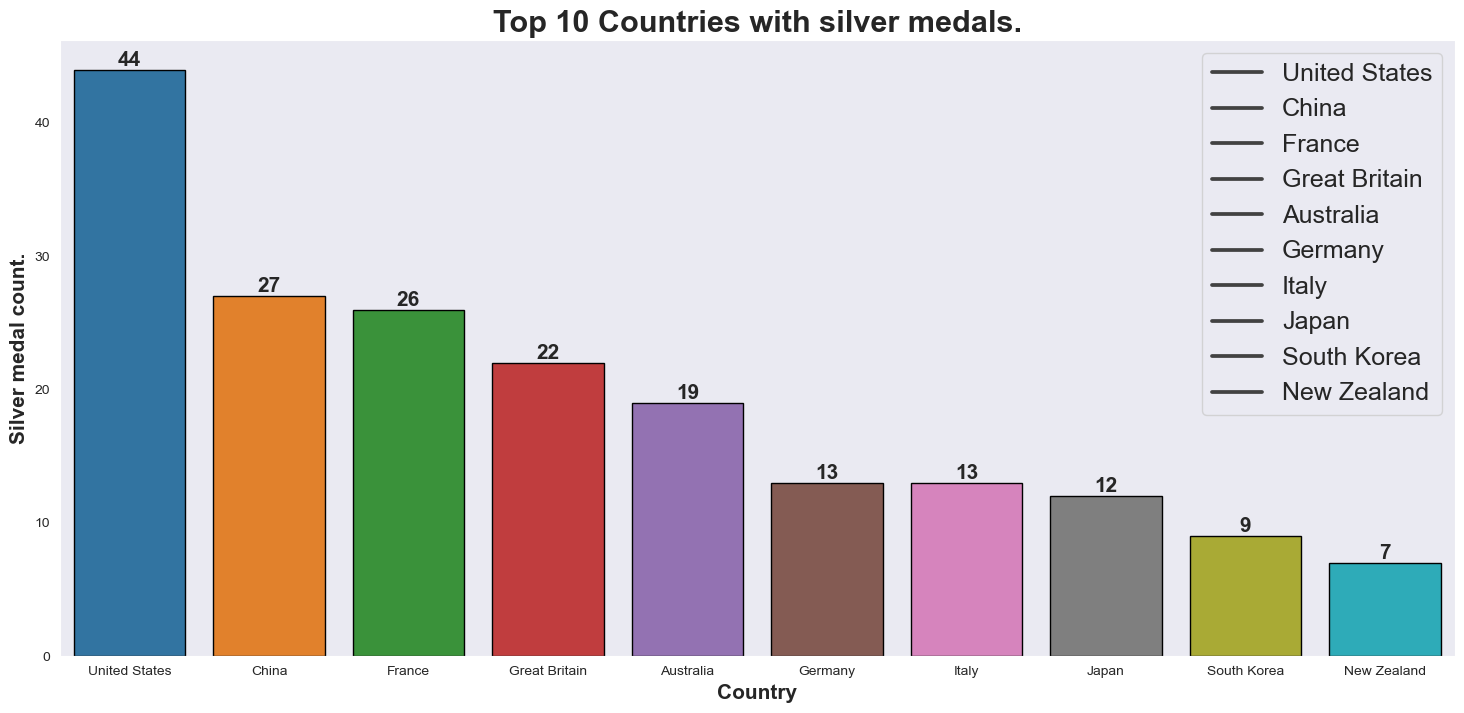

In [19]:
plt.figure(figsize=(18,8))
ax=sns.barplot(data=silver_coutry, x='Country', y='Silver', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fontweight='bold', fontsize=15)
plt.title("Top 10 Countries with silver medals.", fontweight='bold', fontsize=22)
plt.xlabel('Country', fontweight='bold', fontsize=15)
plt.ylabel('Silver medal count.', fontweight='bold', fontsize=15)
plt.legend(silver_coutry['Country'], fontsize=18)
plt.show()

### From the above graph we can conclude that United states has got 44 most Silver medals followed by china, France and Great Britain with 27, 26 and 22 Silver medals respectively..

In [20]:
#  Top 10 countries with Bronze medals..
bronze_contry = dataset.groupby(['Country'], as_index=False)['Bronze'].sum().sort_values(by='Bronze', ascending=False).head(10)
bronze_contry

,Country,Bronze
88,United States,42
32,Great Britain,29
15,China,24
29,France,22
4,Australia,16
43,Italy,15
46,Japan,13
58,Netherlands,12
12,Canada,11
77,South Korea,10


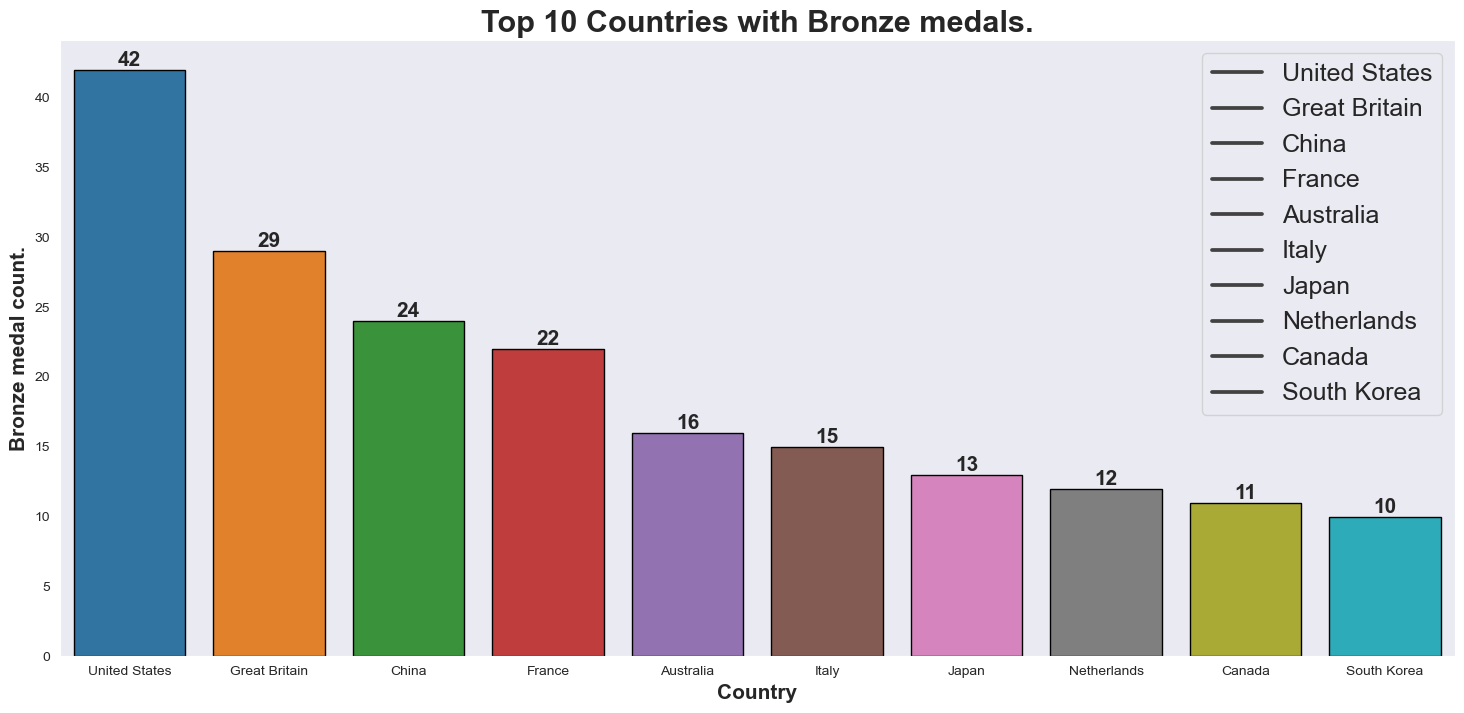

In [21]:
plt.figure(figsize=(18,8))
ax=sns.barplot(data=bronze_contry, x='Country', y='Bronze', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fontweight='bold', fontsize=15)
plt.title("Top 10 Countries with Bronze medals.", fontweight='bold', fontsize=22)
plt.xlabel('Country', fontweight='bold', fontsize=15)
plt.ylabel('Bronze medal count.', fontweight='bold', fontsize=15)
plt.legend(bronze_contry['Country'], fontsize=18)
plt.show()

### From the above graph we can conclude that United states has got 42 most Bronze medals followed by Great Britain,china and France with 29, 24 and 22 Bronze medals respectively..

In [22]:
# Total medal count of top 10 countries...
total_count = dataset.groupby(['Country'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False).head(10)
total_count

,Country,Total
88,United States,126
15,China,91
32,Great Britain,65
29,France,64
4,Australia,53
46,Japan,45
43,Italy,40
58,Netherlands,34
31,Germany,33
77,South Korea,32


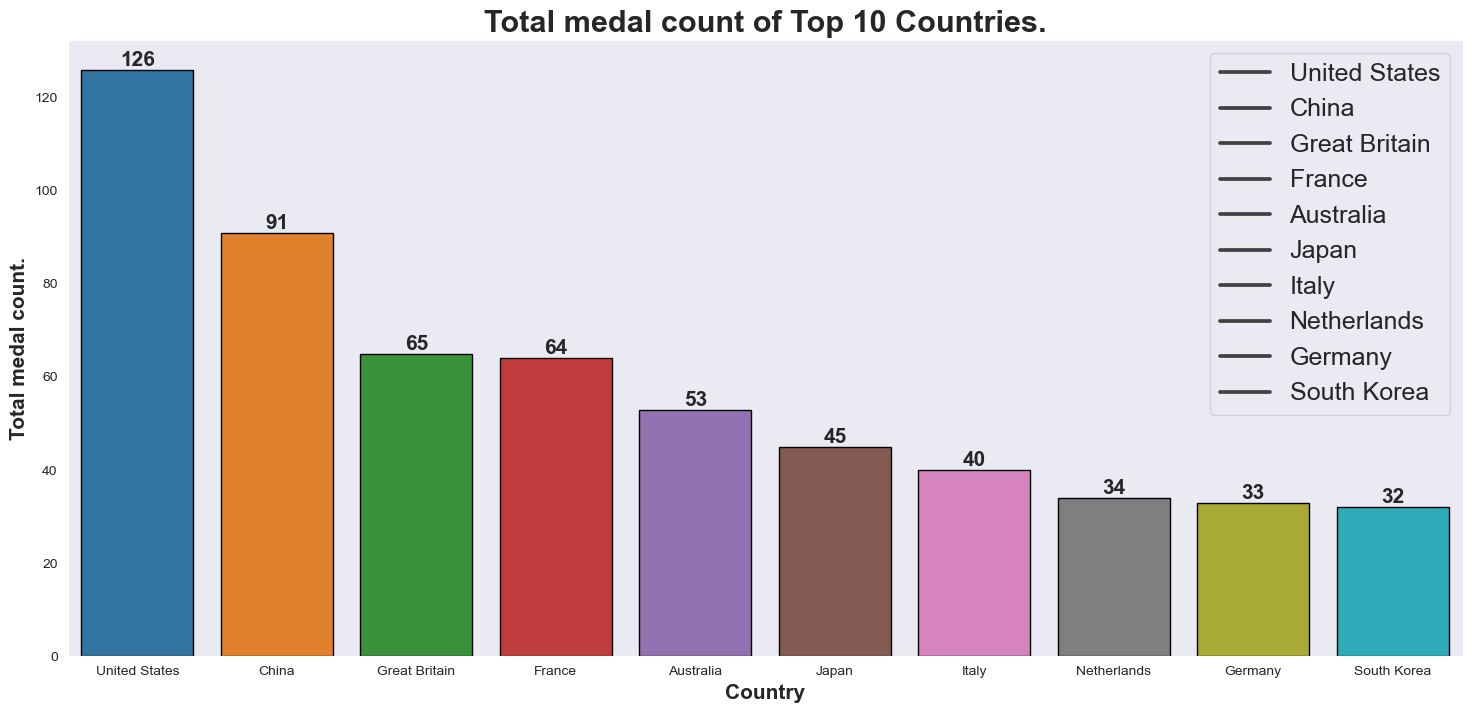

In [23]:
plt.figure(figsize=(18,8))
ax=sns.barplot(data=total_count, x='Country', y='Total', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fontweight='bold', fontsize=15)
plt.title("Total medal count of Top 10 Countries.", fontweight='bold', fontsize=22)
plt.xlabel('Country', fontweight='bold', fontsize=15)
plt.ylabel('Total medal count.', fontweight='bold', fontsize=15)
plt.legend(total_count['Country'], fontsize=18)
plt.show()

## Conclusion==>>
1) Top most scorer country is  **United States**  with  **40 Gold**,  **44 Silver**  and  **42 Bronze**  medals total of  **126 medals**.
2) Second top scorer country is  **China**  with  **40 Gold**,  **27 Silver**,  and  **24 Bronze**  total of  **91 medals**.
3) **Great Britain**  is the third top most scorer country with  **14 Gold**,  **22 Silver**,  and  **29 Bronze** total of **65 medals**.

In [24]:
plt.

SyntaxError: invalid syntax (457645448.py, line 1)